<a href="https://colab.research.google.com/github/Mhernandezg/AlgoritmosOptimizacionVIU/blob/main/Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Maycol Hernández García <br>
Link:   https://colab.research.google.com/drive/1W9GWkQQj403tC7u_soV0OD4yt-Ts1d3c?usp=sharing <br>
Github: https://github.com/Mhernandezg/AlgoritmosOptimizacionVIU/blob/main/Algoritmos_AG3.ipynb
<br>




In [ ]:
import math
import itertools
import random

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

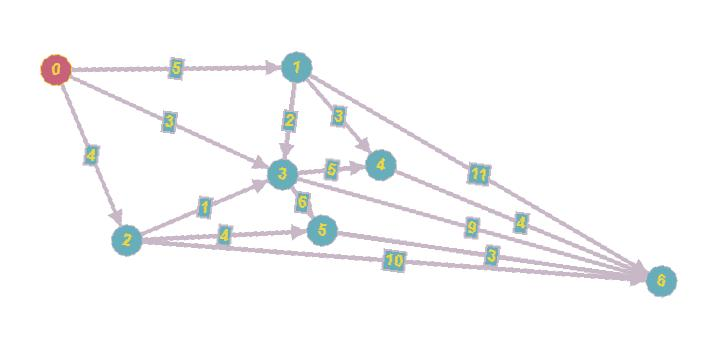

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################
#Se indica 0 si es el mismo nodo desde el cual parte

TARIFAS = [
[0,5,4,3,float("inf"),float("inf"),float("inf")],   #desde nodo 0
[float("inf"),0,float("inf"),2,3,float("inf"),11],  #desde nodo 1
[float("inf"),float("inf"), 0,1,float("inf"),4,10], #desde nodo 2
[float("inf"),float("inf"),float("inf"), 0,5,6,9], #desde nodo 3
[float("inf"),float("inf"), float("inf"),float("inf"),0,float("inf"),4], #desde nodo 4
[float("inf"),float("inf"), float("inf"),float("inf"),float("inf"),0,3], #desde nodo 5
[float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),0] #desde nodo 6
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            #MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            # Al cumplir la condicional. Se entiende la sumatoria es el valor minimo
            # Por lo tanto calcular el MIN se siente redundante
            MIN = PRECIOS[i][k] + TARIFAS[k][j]
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
# Indica una matriz donde cada fila es el nodo desde el que sale y cada columna indica el costo minimo para ir a ese nodo
# Ejemplo, en la posicion [0][1]=5 que indica que para el nodo 0 ir al nodo 1 el costo minimo es 5
for i in range(len(TARIFAS)):
  print("Costo Minimos para el nodo " + str(i) + ": " + str(PRECIOS[i]))


print("\nRUTA")
for i in range(len(TARIFAS)):
  print("Mejor ruta iniciando desde el nodo " + str(i) + ": " + str(RUTA[i]))

PRECIOS
Costo Minimos para el nodo 0: [9999, 5, 4, 3, 8, 8, 11]
Costo Minimos para el nodo 1: [9999, 9999, inf, 2, 3, 8, 7]
Costo Minimos para el nodo 2: [9999, 9999, 9999, 1, 6, 4, 7]
Costo Minimos para el nodo 3: [9999, 9999, 9999, 9999, 5, 6, 9]
Costo Minimos para el nodo 4: [9999, 9999, 9999, 9999, 9999, inf, 4]
Costo Minimos para el nodo 5: [9999, 9999, 9999, 9999, 9999, 9999, 3]
Costo Minimos para el nodo 6: [9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
Mejor iniciando desde el nodo 0: ['', 0, 0, 0, 1, 2, 5]
Mejor iniciando desde el nodo 1: ['', '', 1, 1, 1, 3, 4]
Mejor iniciando desde el nodo 2: ['', '', '', 2, 3, 2, 5]
Mejor iniciando desde el nodo 3: ['', '', '', '', 3, 3, 3]
Mejor iniciando desde el nodo 4: ['', '', '', '', '', 4, 4]
Mejor iniciando desde el nodo 5: ['', '', '', '', '', '', 5]
Mejor iniciando desde el nodo 6: ['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    # Ya que RUTA indica para cada nodo que ruta es la mejor para ir a cualquier nodo del grafo
    # Solo se accede recorriendo el camino desde el final hasta el inicio
    # Siendo asi que si voy a 6 desde el nodo 4.
    # Un posible error es que se indica que para ir al nodo 5 hay que salir desde 4. Pero en el grafo no esta esa conectividad
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es: " + str(calcular_ruta(RUTA, 0,6)) + ". Con costos de: " + str(PRECIOS[0][6]))



La ruta es: 0,2,5. Con costos de: 11


##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

# Funcion que permite la generacion de matrices con numeros aleatorios de dimenciones NxN
def generar_matriz(N, minimo=10, maximo=100):
    return [[random.randint(minimo, maximo) for _ in range(N)] for _ in range(N)]

# Funcion que permite calcular el tiempo que tarda cada funcion en generar soluciones
def medir_tiempo(funcion, *args):
    import time
    inicio = time.perf_counter()
    funcion(*args)
    fin = time.perf_counter()
    return fin - inicio

# Matrices de diversas dimenciones para encontrar tiempos de respuesta optimos y no optimos
COSTES_1 = generar_matriz(1)
COSTES_2 = generar_matriz(2)
COSTES_3 = generar_matriz(3)
COSTES_4 = generar_matriz(4)
COSTES_5 = generar_matriz(5)
COSTES_6 = generar_matriz(6)
COSTES_7 = generar_matriz(7)
COSTES_8 = generar_matriz(8)
COSTES_9 = generar_matriz(9)
COSTES_10 = generar_matriz(10)
COSTES_11 = generar_matriz(11)
COSTES_12 = generar_matriz(12)
COSTES_13 = generar_matriz(13)
COSTES_14 = generar_matriz(14)
COSTES_15 = generar_matriz(15)


In [ ]:
def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ""
  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_solucion = s
      mejor_valor = valor_tmp
  print("La mejor solucion es: ", mejor_solucion)
  print("con valor: ", mejor_valor)

fuerza_bruta(COSTES)

La mejor solucion es:  (0, 3, 1, 2)
con valor:  61


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [ ]:
print("Ejecución Fuerza Bruta\n")

for n in range(1, 16):
    costes = globals()[f"COSTES_{n}"]
    tiempo = medir_tiempo(fuerza_bruta, costes)
    print(f"Tiempo Fuerza Bruta {n}x{n}: {tiempo}")


Ejecución Fuerza Bruta

La mejor solucion es:  (0,)
con valor:  51
Tiempo Fuerza Bruta 1x1: 4.3275998905301094e-05
La mejor solucion es:  (0, 1)
con valor:  88
Tiempo Fuerza Bruta 2x2: 2.736799797276035e-05
La mejor solucion es:  (2, 0, 1)
con valor:  85
Tiempo Fuerza Bruta 3x3: 3.13259988615755e-05
La mejor solucion es:  (1, 0, 2, 3)
con valor:  145
Tiempo Fuerza Bruta 4x4: 4.6001998271094635e-05
La mejor solucion es:  (1, 4, 2, 3, 0)
con valor:  96
Tiempo Fuerza Bruta 5x5: 0.000145804002386285
La mejor solucion es:  (0, 2, 3, 5, 4, 1)
con valor:  125
Tiempo Fuerza Bruta 6x6: 0.0009318929987784941
La mejor solucion es:  (2, 5, 1, 6, 0, 4, 3)
con valor:  177
Tiempo Fuerza Bruta 7x7: 0.008391653002036037
La mejor solucion es:  (6, 7, 5, 2, 0, 4, 3, 1)
con valor:  171
Tiempo Fuerza Bruta 8x8: 0.05463864200282842
La mejor solucion es:  (1, 8, 5, 4, 2, 0, 7, 6, 3)
con valor:  200
Tiempo Fuerza Bruta 9x9: 0.5747496690019034
La mejor solucion es:  (8, 5, 3, 0, 2, 1, 4, 9, 7, 6)
con valor:  2

Se evidencia que para ejecucion de Fuerza Bruta despues de una matriz 10x10 el consumo de RAM es tal que el propio COLAB decidio no seguir con su ejecucion.

Se da a entender que si bien es un crecimiento exponencial. Hay tamaños que son viables segun el contexto.

Para un contexto academico y de aprendizaje una matriz 10x10 es un tope aceptable.

Aun asi, para un contexto laboral en la industria se entenderia que tiempos superiores a la matriz 4x4 serian tiempos de respuesta altos para un mundo donde cada milesima de segundo en respuestas pueden desempeñar un factor importante en la logica de negocio.

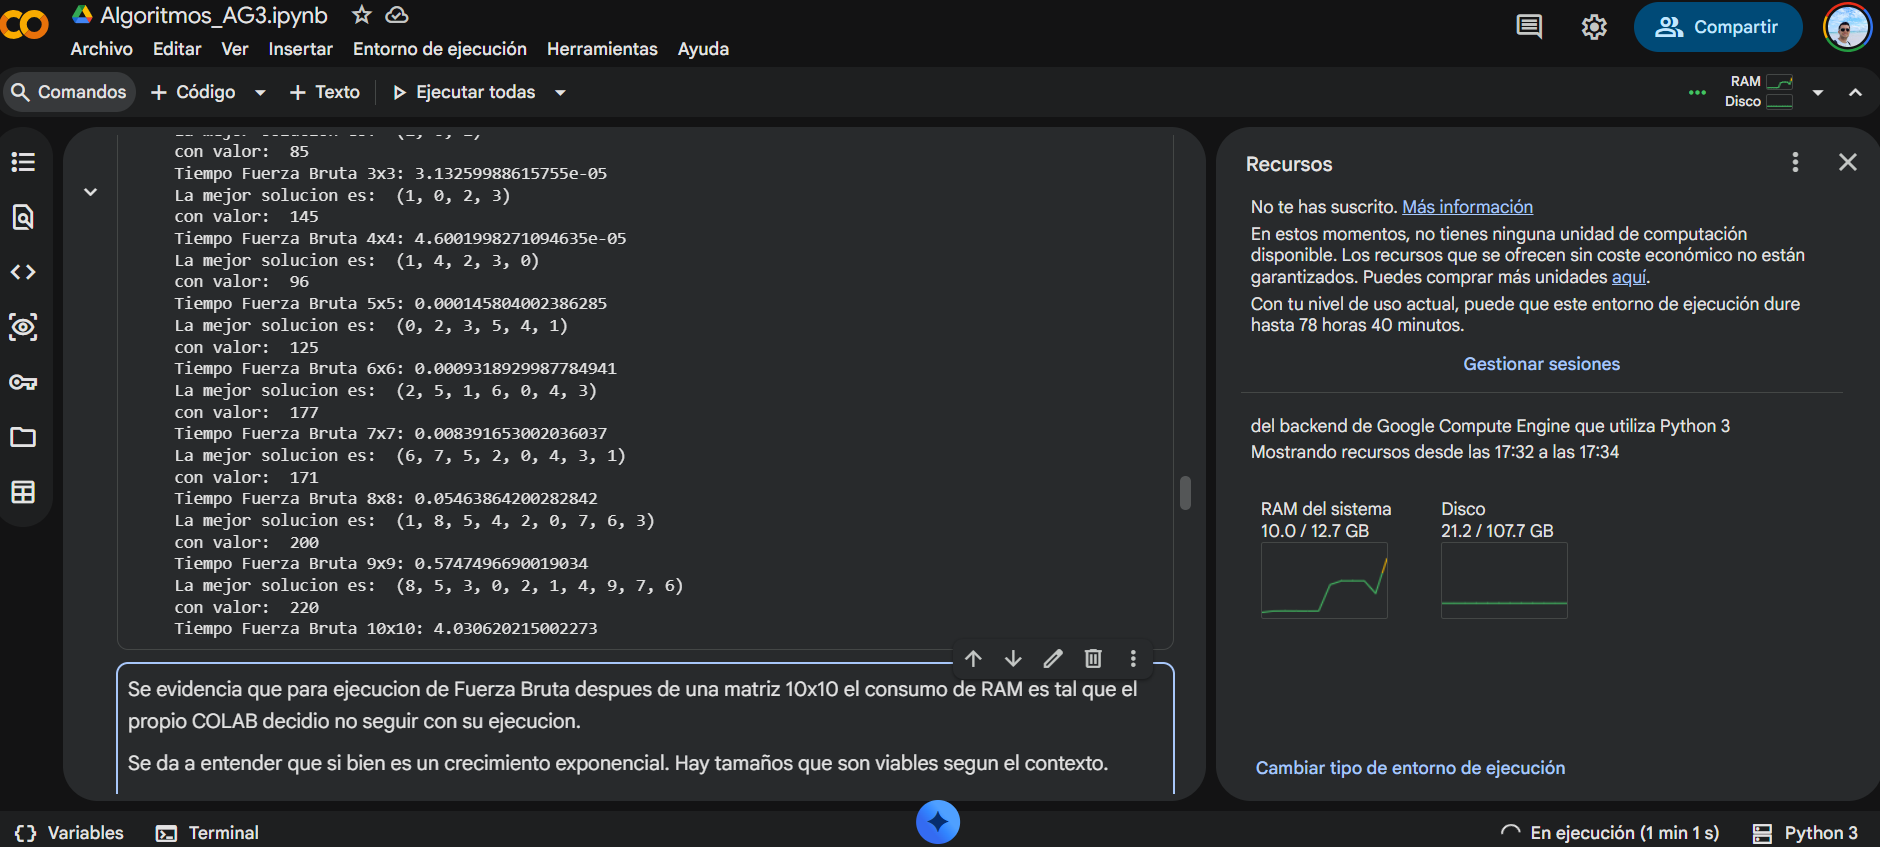

In [ ]:
print("Ejecución Ramificación y Poda\n")

for n in range(1, 16):
    costes = globals()[f"COSTES_{n}"]
    tiempo = medir_tiempo(ramificacion_y_poda, costes)
    print(f"Tiempo Ramificación Poda {n}x{n}: {tiempo}")


Ejecución Ramificación y Poda

La solucion final es: (0,)  en  1  iteraciones  para dimension:  1
Tiempo Ramificación Poda 1x1: 0.00010479499906068668
La solucion final es: [{'s': (1, 0), 'ci': 133}]  en  2  iteraciones  para dimension:  2
Tiempo Ramificación Poda 2x2: 4.1861003410303965e-05
La solucion final es: [{'s': (2, 0, 1), 'ci': 128}]  en  9  iteraciones  para dimension:  3
Tiempo Ramificación Poda 3x3: 7.355899651884101e-05
La solucion final es: [{'s': (3, 2, 1, 0), 'ci': 168}]  en  20  iteraciones  para dimension:  4
Tiempo Ramificación Poda 4x4: 0.00014869000006001443
La solucion final es: [{'s': (3, 0, 2, 1, 4), 'ci': 115}]  en  37  iteraciones  para dimension:  5
Tiempo Ramificación Poda 5x5: 0.00033858499955385923
La solucion final es: [{'s': (1, 5, 3, 0, 4, 2), 'ci': 156}]  en  79  iteraciones  para dimension:  6
Tiempo Ramificación Poda 6x6: 0.001079192999895895
La solucion final es: [{'s': (6, 3, 2, 4, 1, 5, 0), 'ci': 159}]  en  65  iteraciones  para dimension:  7
Tiem

KeyboardInterrupt: 

Acorde a lo visto con PODA. Se entiende que en cuanto a consumo de RAM es una alternativa altamente eficiente respecto a la implementacion de fuerza bruta. Aun asi, los tiempos que tarda en ejecutar en el caso de la matriz 12x12 donde se asume no se encontro el mejor escenario se da a entender que el tiempo de ejecucion aunque variable segun el escenario entre el mejor y peor. Sigue siendo altamente costoso en tiempos de ejecucion.

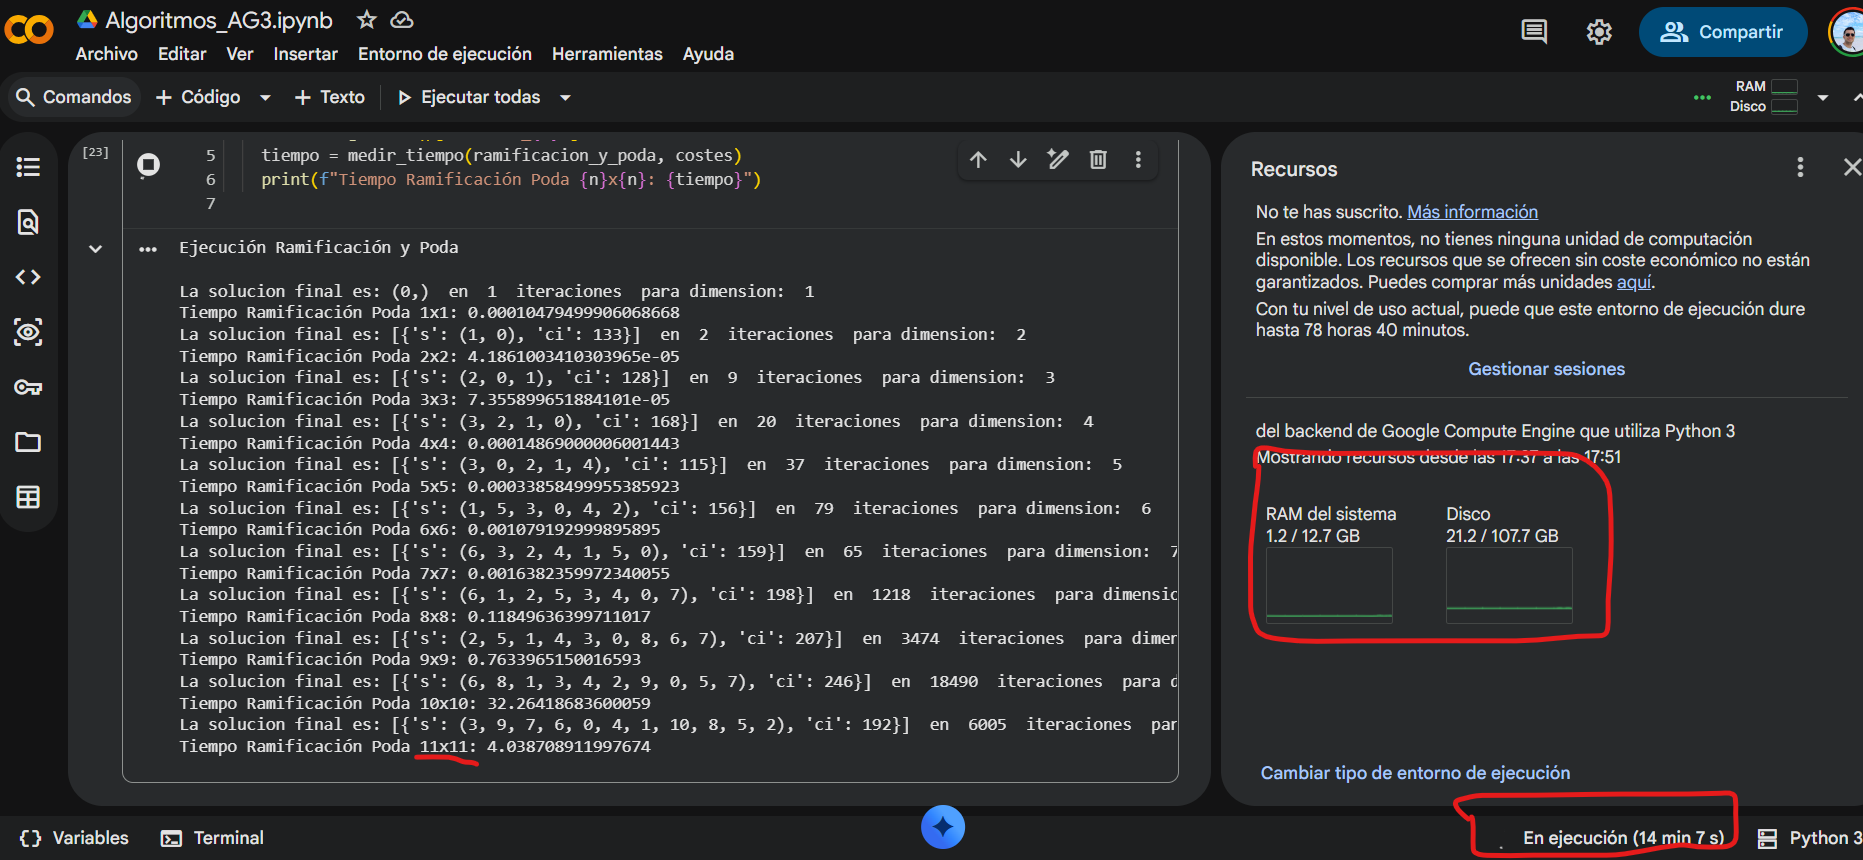

##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

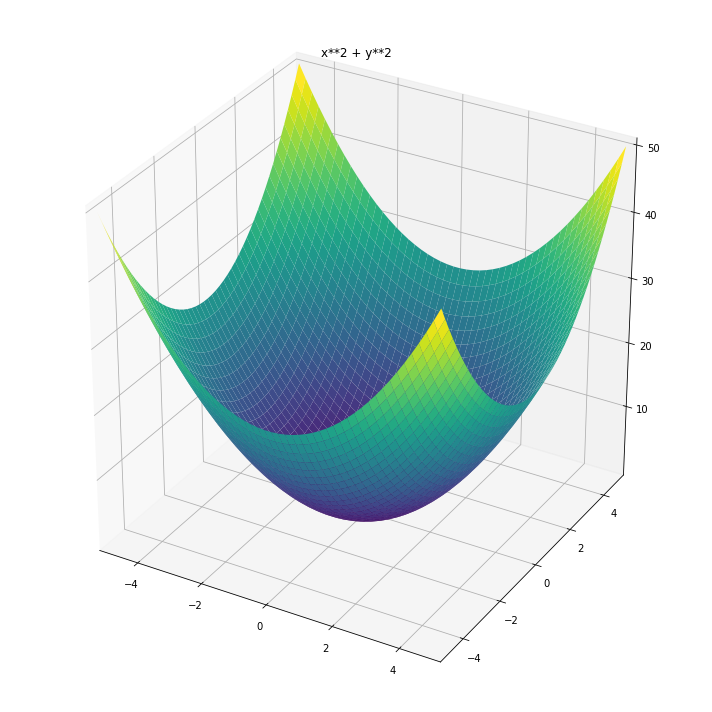

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

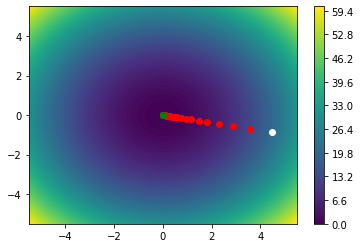

Solucion: [6.380863075730166e-05, -1.2115726177934234e-05] 4.218332179940345e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
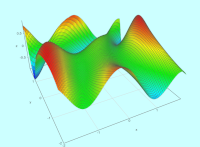


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
